In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurements = Base.classes.measurement
stations = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
new_date = session.query(func.max(measurements.date)).first()
new_date

('2017-08-23',)

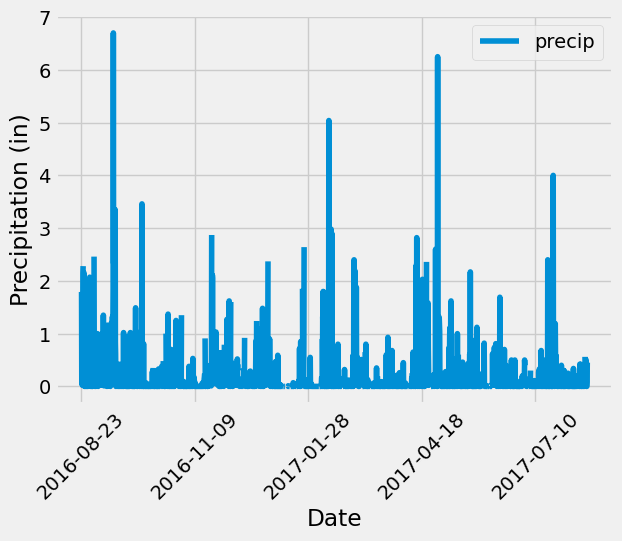

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year = dt.date(2017, 8, 23)-dt.timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores
oy_precip = session.query(measurements.date, measurements.prcp).filter(measurements.date>=one_year).all()
oy_precip
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(oy_precip, columns = ['date', 'precip'])

# Sort the dataframe by date
df = df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x='date', y='precip', rot=45)
plt.xlabel('Date')
plt.ylabel('Precipitation (in)')
plt.savefig('images/precipitation.png')
plt.show()



In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precip
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(stations.station)).all()

[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
session.query(measurements.station, func.count(measurements.station)).group_by(measurements.station).order_by(func.count(measurements.station).desc()).all()
# List the stations and the counts in descending order.
# SELECT station, count(station)
# FROM stations
# GROUP BY station
# ORDER BY station DESC

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measurements.tobs), func.avg(measurements.tobs), func.max(measurements.tobs)).filter(measurements.station=="USC00519281").all()

[(54.0, 71.66378066378067, 85.0)]

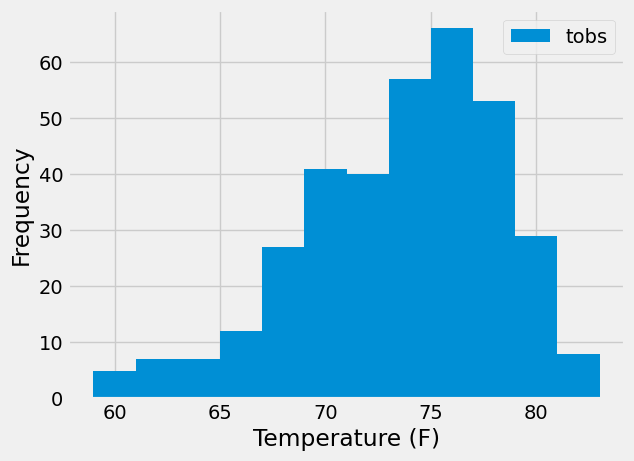

In [24]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
one_year = dt.date(2017, 8, 23)-dt.timedelta(days = 365)
results = session.query(measurements.tobs).filter(measurements.station=="USC00519281").filter(measurements.date>=one_year).all()
df = pd.DataFrame(results, columns=['tobs'])
df.plot(kind='hist', bins=12 )
plt.xlabel('Temperature (F)')
plt.savefig('images/hist.png')
plt.show()

# Close session

In [25]:
# Close Session
session.close()